# Qubit Tic Tac Toe Tutorial
#### The game will use qiskit quantum simulator to run the game. We wil use Aer statevector simulator backend to run the game  

In [18]:
import numpy as np
#load_ext sympy.interactive.ipythonprinting
from IPython.display import display
from sympy import *
init_printing(use_latex = True)

#use qiskit to draw circuit
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Use Aer's statevector simulator
simulator = Aer.get_backend('statevector_simulator')

##### Create a 3x3 board. This is the same as preparing 9 qubits.  
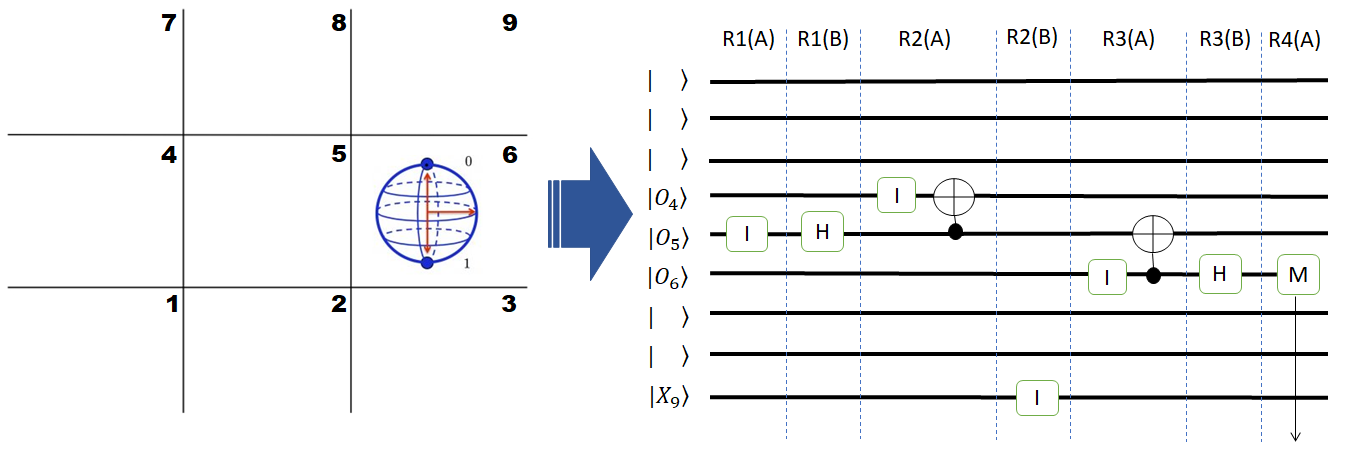

In [19]:
#Create a 9 register quantum circuit
global circuit
circuit = QuantumCircuit(9,9)

#### The board is empty until the player decides to place a qubit onto the board. However, we have initialized 9 qubits. 
#### Thus, we need a function to record the status of the board
#### The status of the board is an dim(9) integer array. 
#### We need to create a variable "player" to record which player is making the move too. 

In [20]:
global status
status = status = np.zeros(9)
def update_status(move,register0): 
    if move == 0:  #0 means empty, 1 means a qubit has been placed in the register
                   #3 means the qubit has been measured
        status[register0 -1] = 1
    if move == 3:
        status[register0 -1] = 3
global player
player = 1

#### The game allow the user to perform the following moves: Prepare pure state qubit, Hadamard Gate, X gate and Measurement.
#### Playermove registers the move makes by the player.
#### Playermove | Moves
#0 - prepare a pure state qubit, 
#1 - Hadamard Gate
#2 - X gate
#3 - Measurement
#### We define a function move which will put the gate in the respective register and return the outputstate 

In [21]:
def move(player,register0,playermove): 
    if playermove == 0:
        if player == 1:
            circuit.iden(register0-1)
            update_status(playermove,register0)
        if player == 2:
            circuit.x(register0-1)
            circuit.iden(register0-1)
            update_status(playermove,register0)
    elif playermove == 1:
        circuit.h(register0-1)
    elif playermove == 2:
        circuit.x(register0-1)
    elif playermove == 3:
        circuit.measure(register0-1,register0-1)
        update_status(playermove,register0)
    # Execute the circuit
    job = execute(circuit,simulator)
    result = job.result()
    outputstate = result.get_statevector()
    return outputstate

#### Lets check what is the quantum state when we choose to initiaze a qubit at register 5 and apply a Hadamard gate on it.

In [22]:
outputstate = move(1,5,0) #prepare a pure state qubit
outputstate = move(1,5,1) #put a hadamard gate
print(outputstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.      

#### Hmm, seems like the outputstate array is difficult to read(of course, since there are 9 qubits, which means the array has a dimension of 512)
#### We shall define a function which will print out the value in braket notation.

In [23]:
def braket_notation(statevector,qubitnumber):
    #print out the wavefunction in braket notation.
    #binary reads from right to left
    ket = ''
    for index,element in enumerate(statevector):
        if element != 0:
            if ket == '':
            #only print out states with non-zero probability amplitude
                fullket = bin(index)[2:].zfill(qubitnumber)
                ket += str(element)+'|'+ bin(index)[2:].zfill(qubitnumber) +'>'
               # print(index)
            else:
                ket = ket + ' + ' + str(element)+'|'+ bin(index)[2:].zfill(qubitnumber) +'>'
               # print(index)
    return ket

In [24]:
print(braket_notation(outputstate,9)) 

(0.7071067811865476+0j)|000000000> + (0.7071067811865476+0j)|000010000>


#### Much better! Let's see what happen when we choose to measure box 5!

In [25]:
outputstate = move(1,5,3)
print(braket_notation(outputstate,9))

(1+0j)|000000000>


#### As you can see here, the quantum state collapses to 1 of the 2 states. We need a function which is able to print out the measurement result. 

In [26]:
def measurement_result(outputstate,measured_register,qubitnumber):
    for index,element in enumerate(outputstate):
        if element != 0:
            ket = bin(index)[2:].zfill(qubitnumber)
            result = ket[qubitnumber-measured_register] #the ket is read from right to left(|987654321>)
            break #break the iteration since we have obtained the result
    return result

In [27]:
measurement_result(outputstate,5,9)

'0'

#### Lets draw the quantum circuit

In [12]:
circuit.draw()

#### Looks like the circuit logic is doing great, all that is left to do is the game logic. The game allows the player to make either 2 unitary moves or 1 measurement each round. 